# Otimização em série

Aqui farei a otmização do controlador individual por junta pois a otimização em lote se mostrou ineficiente para mecanismos com uma quantidade elevada de graus de liberdade.

In [1]:
include("../comum.jl")
include("../modelos.jl")
using Evolutionary, Plots;
pyplot();

In [2]:
Ts = 0.08     #período de leitura
tend = 2.0    #tempo final
t0 = 0.0      # tempo inicial
popul  = 25   # população
iterac = 10    #iterações
a = 10. 
b = 0.01
xr = SVector{7}([1.,1.,0.5,0.6,0.5,1.2,0.8]);

## Otimização junta 7

In [3]:
function gerador7(n)
    n = n/2
    kp = push!(ones(n-1),rand()*rand([10.,100.,1000.,10000]))
    kv = push!(ones(n-1),rand()*rand([10.,100.,1000.]))
    vcat(kp,kv)
end;

In [4]:
function generateCusto(junta::Integer)
    out = function custo(gain::Vector{Float64})
        kp = SMatrix{7,7}(diagm(gain[1:7]))
        kv = SMatrix{7,7}(diagm(gain[8:end]))
        x, v, t, a, ta, j, tj = kukaRobot(kp, kv, Ts, t0, tend, xr)
        sizeVector = length(x[1])

        erro_sum = 0.
        erro = -(x[junta]-xr[junta])
        erro_sum += sum(abs.(erro[floor(Integer,sizeVector/3):end])) 

        jerk_sum = 0.
        jerk_sum += sum(abs.(j[junta]))
        #println("antes: $(erro_sum) | $(jerk_sum) | $(junta)")
        erro_sum = erro_sum * a
        jerk_sum = jerk_sum * b

        out =  erro_sum + jerk_sum
        #println("depois: $(erro_sum) | $(jerk_sum) | $(junta)")
        out
    end
end;

In [5]:
N = 14
result, fitness, cnt = ga(generateCusto(7), N; initPopulation = gerador7, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac)

0.05870263767019823 | 13.95928970365601 | 7
0.0021997009376495402 | 0.19547076888673637 | 7
95.54079162002365 | 0.6564125187972865 | 7
12.53319131551941 | 3.397040281116156 | 7
0.6675154805600114 | 14.634396616616316 | 7
0.25027547011617357 | 14.517103988133082 | 7
0.5546271616811516 | 15.535885641992207 | 7
20.66292739327041 | 3.3254757443294354 | 7
100.63634974076274 | 0.5502748654259559 | 7
151.2253661799085 | 0.06279657377812488 | 7
149.72403505628066 | 0.12682567074374668 | 7
0.003100970015726956 | 0.13430949888164004 | 7
149.50393762367256 | 0.06679102371555921 | 7
144.6705103199366 | 0.11881023049320188 | 7
17.75686069099024 | 3.332785748448036 | 7
0.009968451428199465 | 0.18304049269183767 | 7
0.04939596244305955 | 12.033519728438039 | 7
139.88375797502755 | 0.13906619261050915 | 7
0.0010392939600256668 | 0.10139163687792892 | 7
0.4930362904244967 | 9.074269880774338 | 7
40.1150720765046 | 1.710111052717405 | 7
0.014288096391111837 | 1.7870366475966122 | 7
0.3034132717281135 | 

Progress:  25%|██████████                               |  ETA: 1:08:56

0.0008030119807078684 | 0.17868374242165425 | 7
0.001412395586811721 | 0.05558781897695873 | 7
0.129712538848058 | 1.5394186640093472 | 7
0.0015433233484785092 | 0.04898364863262609 | 7
1.5050246947413746e265 | NaN | 7


0.0012650793533086624 | 0.1334967829932141 | 7
0.0016311586735706651 | 1.2489434888497217 | 7
0.001800597181280672 | 0.08592686554437697 | 7
0.0021997009376495402 | 0.19547076888673637 | 7
0.014288096391111837 | 1.7870366475966122 | 7
0.0013184154216527855 | 0.06399767345182247 | 7
0.00932393938800069 | 0.16486079888986824 | 7
0.001109110589446738 | 0.06951332667035585 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.000880347077238941 | 0.383633459163073 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0017444745416084206 | 0.053163172383081 | 7
0.0026692860079013947 | 0.23248781859404782 | 7
0.0013673650193823939 | 0.08922909839165336 | 7
0.0011023073520066706 | 0.35432030879633963 | 7
0.0010683484590567893 | 0.0652990684435953 | 7
0.0017104638735332411 | 0.06064029026892385 | 7
0.002491768771755165 | 0.1462399539425786 | 7
0.0010051458781457079 | 0.03900813653612415 | 7
0.00561397658762397 | 0.12951652698417662 | 7
0.0026520132969454213 | 0.07947325161618977 | 7
0.00120716

0.0022893857720085453 | 0.11372379635744867 | 7
0.0014443093994975786 | 0.03939948508354538 | 7
0.0014364583390680252 | 0.06704860074315903 | 7
0.0011936151739300183 | 0.0577824928755204 | 7
0.0012391465543071245 | 0.0710794933315972 | 7
0.009968451428199465 | 0.18304049269183767 | 7
0.0027536240902836795 | 0.36446180976101966 | 7
0.000815680664629781 | 0.05811993015235228 | 7
0.0011661686226993595 | 0.054717460591197406 | 7
0.001109110589446738 | 0.06951332667035585 | 7
0.001109110589446738 | 0.06951332667035585 | 7
0.0010392939600256668 | 0.10139163687792892 | 7
0.001412395586811721 | 0.05558781897695873 | 7
0.0014288446401633514 | 0.08842479435829421 | 7
0.001475459163486903 | 0.04729970595716569 | 7
0.003100970015726956 | 0.13430949888164004 | 7
0.0012538984627707972 | 0.04961179750932072 | 7
0.0015102825785062723 | 0.059101209046397755 | 7
0.0013855195639089768 | 0.12904965436377605 | 7
1.5050246947413746e265 | NaN | 7


Progress:  50%|████████████████████                     |  ETA: 0:25:27

0.0008030119807078684 | 0.17868374242165425 | 7
0.0008624212469410253 | 0.34257077772104383 | 7
0.000576790495330215 | 0.5747592901981038 | 7
0.000576790495330215 | 0.5747592901981038 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0011661686226993595 | 0.054717460591197406 | 7
0.0012538984627707972 | 0.04961179750932072 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.001412395586811721 | 0.05558781897695873 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.000576790495330215 | 0.5747592901981038 | 7
0.000576790495330215 | 0.5747592901981038 | 7
0.001412395586811721 | 0.05558781897695873 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.000576790495330215 | 0.5747592901981038 | 7
0.000576790495330215 | 0.5747592901981038 | 7
0.000576790495330215 | 0.5747592901981038 | 7
0.000576790495330215 | 0.5747592901981038 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030

0.0008030119807078684 | 0.17868374242165425 | 7


Progress:  75%|███████████████████████████████          |  ETA: 0:09:01

1.5050246947413746e265 | NaN | 7
0.0008797823231421198 | 0.16332739962637557 | 7
0.001412395586811721 | 0.05558781897695873 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0007135883617448435 | 0.14854138951764725 | 7
0.000886265666900643 | 0.2730503270961118 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.001129611658031715 | 0.03900910813285073 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008477002961104763 | 0.2444310402162385 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.001475459163486903 | 0.04729970595716569 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.0008030119807078684 | 0.17868374242165425 | 7
0.00080301198

Progress: 100%|█████████████████████████████████████████| Time: 0:27:41


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 7819.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.89284], 0.04001328241426986, 3, NaN, Dict{Symbol,Any}())

## Otimização junta 6

In [23]:
function gerador6(n)
    n = n/2
    kp = push!(ones(n-2),rand()*rand([10.,100.,1000.,10000]))
    push!(kp,result[7])
    kv = push!(ones(n-2),rand()*rand([10.,100.,1000.]))
    push!(kv,result[14])
    vcat(kp,kv)
end;

In [26]:
N = 14
result, fitness, cnt = ga(generateCusto(6), N; initPopulation = gerador6, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac)

0.12793888367828687 | 17.40312516984227 | 6
97.76774436689293 | 1.5920087758365844 | 6
150.9243971385254 | 5.021685660980057 | 6
161.7378433201418 | 0.6705920120283377 | 6
7.260718164743465 | 8.234278514279044 | 6
0.042293709401375335 | 0.10173537545471245 | 6
8.315287843909989 | 10.241047317634274 | 6
1.0689253506862872 | 16.467327067054747 | 6
0.5952119586449145 | 1.3137676138743948 | 6
185.95997117107115 | 0.48835058214786253 | 6
189.44953795512646 | 0.8271092787031608 | 6
6.419784820629659 | 22.54717149358293 | 6
206.4685981927752 | 0.9067748908308433 | 6
0.1912238261588728 | 0.3538004405703087 | 6
8.9104027642228 | 25.259863843379254 | 6
106.82239928141797 | 1.456572836118862 | 6
96.78307549574151 | 1.5257015866798735 | 6
104.5408636117894 | 4.993000704226398 | 6
1.4641414304317846 | 21.79672556559241 | 6
4.705321387246055 | 11.921568032180662 | 6
48.03946432407294 | 6.0829528402177635 | 6
54.85316237155609 | 2.659699646099223 | 6
0.34406764490581443 | 7.082646716510291 | 6
188.70

Progress:  25%|██████████                               |  ETA: 0:06:00

6.011609604660477 | 8.360019477185563 | 6
0.986888010632736 | 8.159249360775016 | 6
0.09391244093202467 | 0.19530764561375338 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.05111004589112289 | 0.18695327075458767 | 6
0.09577682817763611 | 0.3212641510352463 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.23341953870357424 | 0.5109408933880883 | 6
0.06311867443742569 | 0.11036219465108436 | 6
0.042293709401375335 | 0.10173537545471245 | 6
4.064395645738054 | 9.743350448702099 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.04385185560052962 | 0.06844597755266915 | 6
0.19704089166169725 | 0.34124895711933323 | 6
0.25265872224096597 | 126.80075744850036 | 6
0.09391244093202467 | 0.19530764561375338 | 6
0.5952119586449145 | 1.3137676138743948 | 6
0.042293709401375335 | 0.10173537545471245 | 6
5.662058292319747 | 9.377600088603225 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0

Progress:  50%|████████████████████                     |  ETA: 0:03:11

0.042293709401375335 | 0.10173537545471245 | 6
0.04219363613109817 | 0.09380424142343052 | 6
0.4447308589995136 | 15.157010006835137 | 6
0.04385185560052962 | 0.06844597755266915 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.04339520078427528 | 0.0922675699027288 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.04151496054949355 | 0.0741413605392642 | 6
0.06850124185118656 | 0.1394071632360915 | 6
0.13782594683237726 | 0.2592242181310227 | 6
0.16740825333934284 | 0.24965329231065916 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.04214393506444036 | 0.09535071807984974 | 6
0.040945203595434965 | 0.09057804881199356 | 6
0.04326941274687357 | 0.06612369862047127 | 6
0.044639439640461465 | 0.1235627091275633 | 6
0.04870082957452171 | 0.1967600025552146 | 6
0.04309939704755683 | 0.0667619767347374 | 6
0.04352700645962715 | 0.07677542201133868 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.042293709401375335 | 0.1017353754

Progress:  75%|███████████████████████████████          |  ETA: 0:01:20

0.05531499183587085 | 0.16710928825469687 | 6
0.04151496054949355 | 0.0741413605392642 | 6
0.040945203595434965 | 0.09057804881199356 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.04339520078427528 | 0.0922675699027288 | 6
0.059387005304394336 | 0.08047998672826881 | 6
0.04653134268279846 | 0.0984644546912269 | 6
0.05172486182843494 | 0.2098573169508861 | 6
0.04314562352304874 | 0.15248238306423162 | 6
0.06029927513810707 | 0.09994898387283188 | 6
0.043795357339824204 | 0.08177285346871291 | 6
0.042293709401375335 | 0.10173537545471245 | 6
0.04296812950893125 | 0.1108972676707592 | 6
0.04219363613109817 | 0.09380424142343052 | 6
0.05402340747959311 | 0.09003964841906317 | 6
0.06268915086392823 | 0.09388700457661368 | 6
0.04309939704755683 | 0.0667619767347374 | 6
0.04222688018617804 | 0.09841459148066843 | 6
0.04188300235881126 | 0.10958396889445565 | 6
0.06803713011673374 | 0.21133839263700857 | 6
0.04219363613109817 | 0.09380424142343052 | 6
0.043604398658452226 | 0.1986603472

Progress: 100%|█████████████████████████████████████████| Time: 0:04:53


([1.0, 1.0, 1.0, 1.0, 1.0, 8341.59, 7819.98, 1.0, 0.997851, 0.925294, 0.972366, 1.0, 36.2413, 6.89284], 0.10939311136734484, 3, 0.0, Dict{Symbol,Any}())

## Otimização junta 5

In [43]:
function gerador5(n)
    n = n/2
    kp = push!(ones(n-3),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[6:7])
    kv = push!(ones(n-3),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[13:14])
    vcat(kp,kv)
end;

In [44]:
N = 14
result, fitness, cnt = ga(generateCusto(5), N; initPopulation = gerador5, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac)

0.014009645050913622 | 5.19119967615172 | 5
91.17653303448746 | 1.4950011512169863 | 5
56.6350087994973 | 2.14415642613042 | 5
0.04075167694590709 | 0.4951622547033373 | 5
85.93990124642671 | 0.4405752164319791 | 5
0.02117200444792189 | 0.3076227846556587 | 5
35.54315877140902 | 26.955110848740446 | 5
4.232374942486479 | 2.9650580797473833 | 5
50.78569393287747 | 81.01632477943119 | 5
0.023998332025331193 | 230.0119385690198 | 5
95.78329046691584 | 1.9951525301331614 | 5
2.80630697525096 | 3.4284940650955127 | 5
0.02330546041941106 | 0.9194166115005749 | 5
94.1436472251386 | 0.30021642710274504 | 5
88.99460388539242 | 0.24606983829386841 | 5
46.91703210132288 | 2.1526823415480463 | 5
0.025824234772059973 | 0.40498900386638603 | 5
0.18385434315978444 | 2.3871733756337745 | 5
81.22433295858406 | 0.39466653938601853 | 5
1.739119219046747 | 25.46261113804184 | 5
73.9031175915315 | 5.148925512907928 | 5
0.04126114525079272 | 8.951762836178004 | 5
97.16952565674728 | 2.6492890656775847 | 5
1

Progress:  25%|██████████                               |  ETA: 0:07:14

0.02117200444792189 | 0.3076227846556587 | 5
0.010211886420805616 | 0.26594949013645847 | 5
0.029689454120694347 | 2.7143562701765127 | 5
0.024972963179342167 | 0.9453737225094575 | 5
0.021433723133120752 | 0.41194243953674303 | 5
0.025735076198656892 | 0.39047084832504125 | 5
0.010211886420805616 | 0.26594949013645847 | 5
0.02117200444792189 | 0.3076227846556587 | 5
0.010203346265527102 | 1.219117883722201 | 5
0.17131262455197693 | 9.076880941964943 | 5
0.01833218048937546 | 0.3851516823736229 | 5
0.025349089794968194 | 0.13472037143465654 | 5
0.01049559610589057 | 0.19357031526740337 | 5
0.017220342762000462 | 0.919682673158419 | 5
0.025824234772059973 | 0.40498900386638603 | 5
0.010203346265527102 | 1.219117883722201 | 5
0.027142957822131053 | 0.3576519719717245 | 5
0.014311710356400553 | 1.5342051262285608 | 5
0.01685917503294554 | 98.40733883062323 | 5
0.009532702503101675 | 0.7676944649679668 | 5
78.3405582480369 | 14850.637542826224 | 5
0.04936438214524108 | 0.6150971823870258 |

Progress:  50%|████████████████████                     |  ETA: 0:03:36

0.01049559610589057 | 0.19357031526740337 | 5
0.020784733181563042 | 0.2840201431341893 | 5
0.01783554606585025 | 0.356474511055975 | 5
0.028648982094463538 | 0.6456596934602322 | 5
0.025910700614896198 | 0.3859895751477192 | 5
0.025349089794968194 | 0.13472037143465654 | 5
0.025824234772059973 | 0.40498900386638603 | 5
0.025349089794968194 | 0.13472037143465654 | 5
0.018238447175030204 | 0.14170566824461647 | 5
0.019825983900642052 | 0.3797214719294851 | 5
0.025349089794968194 | 0.13472037143465654 | 5
0.02124325648485581 | 0.32370540026248096 | 5
0.010211886420805616 | 0.26594949013645847 | 5
0.010211886420805616 | 0.26594949013645847 | 5
0.014737017987491163 | 0.3301470060029205 | 5
0.010211886420805616 | 0.26594949013645847 | 5
0.031091865595465062 | 0.7568408658928675 | 5
0.022461549569514072 | 15.41007261858686 | 5
0.01933056045173076 | 0.25631711689416514 | 5
0.020153845150013838 | 0.531272364537853 | 5
0.02117200444792189 | 0.3076227846556587 | 5
0.019256965906635504 | 0.274004

Progress:  75%|███████████████████████████████          |  ETA: 0:01:29

0.013250814688975376 | 0.27165258742479553 | 5
0.012157885904556798 | 0.27074098515162065 | 5
0.011438421065373405 | 0.17772886215255415 | 5
0.008049451917071515 | 0.17276124122475564 | 5
0.036940927479203745 | 0.14984070347093204 | 5
0.01538096416871193 | 0.3121277508526985 | 5
0.016849107689402842 | 0.12970846011134962 | 5
0.025349089794968194 | 0.13472037143465654 | 5
0.01733211065252982 | 0.41887906857962554 | 5
0.01833413344343726 | 0.3921227176489785 | 5
0.012279749502123183 | 0.15451712471599752 | 5
0.018770113884054584 | 0.35654054166967636 | 5
0.02138927490559439 | 0.445669321728092 | 5
0.018238447175030204 | 0.14170566824461647 | 5
0.021820168120279537 | 0.7408974944761133 | 5
0.012669224351296027 | 0.08812897407524713 | 5
0.017220342762000462 | 0.919682673158419 | 5
0.012037001239374456 | 0.17239455665966694 | 5
0.025349089794968194 | 0.13472037143465654 | 5
0.010370147973738364 | 0.14221157854609792 | 5
0.009918974040932227 | 0.25850094598258067 | 5
0.020470118491194844 | 0

Progress: 100%|█████████████████████████████████████████| Time: 0:05:18


([0.935543, 0.996094, 1.0, 1.0, 10852.3, 8341.34, 7819.98, 1.0, 0.996093, 0.999023, 0.999874, 29.0661, 36.2413, 6.89284], 0.10079819842654315, 3, 0.009869798230146706, Dict{Symbol,Any}())

## Otimização junta 4

In [75]:
function gerador4(n)
    n = n/2
    kp = push!(ones(n-4),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[5:7])
    kv = push!(ones(n-4),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[12:14])
    vcat(kp,kv)
end;

In [76]:
N = 14
result, fitness, cnt = ga(generateCusto(4), N; initPopulation = gerador4, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac)

0.3573045316621637 | 48.5540607867491 | 4
4.103899097033815 | 3.6109485337443106 | 4
99.97472912698757 | 2.1308886771405877 | 4
8.692140901274305 | 4.130886407120459 | 4
51.16917934631986 | 0.6535385150689617 | 4
11.423356293183176 | 46.43811721140349 | 4
161.33340458071308 | 40.70631044366672 | 4
70.42371471542839 | 9.534486008700028 | 4
0.7625609074676887 | 55.432318673614894 | 4
4.7472367243543845 | 117.43157006275464 | 4
112.64866709818962 | 0.7454522862541753 | 4
101.10303239403933 | 1.7775302395227903 | 4
110.79492558366769 | 0.23177668222189557 | 4
1.7556812415526064 | 111.73759440500028 | 4
50.3425285078637 | 0.9256631227519805 | 4
18.286958095232563 | 6.122327189470184 | 4
173.65643176750098 | 24.068404533896384 | 4
2.7734657512977066 | 10.414514548114504 | 4
6.2087565199602865 | 3.818119232283002 | 4
112.48321514856185 | 0.9263865995886315 | 4
2.536014047568411 | 10.832997293157616 | 4
1.7691984012946127 | 8.751983830764136 | 4
23.543043906499484 | 13.837919717216897 | 4
81.7

Progress:  25%|██████████                               |  ETA: 0:02:30

0.5758314411362042 | 6.573877938003853 | 4
0.43385314418775023 | 9.931305334746723 | 4
8.390787290511707 | 3.2975700824533356 | 4
0.37612513999017216 | 8.261264583789988 | 4
7.86814798451127 | 9.021074696596946 | 4
5.766230573574039 | 11.605906113388379 | 4
2.5653983923137478 | 11.207284767346268 | 4
2.536014047568411 | 10.832997293157616 | 4
22.576119088582782 | 2.030243680875648 | 4
23.366433512953652 | 1.9368282238705714 | 4
15.94854369672916 | 7.613206489297536 | 4
11.428229383266542 | 14.13821981514247 | 4
7.407378448603329 | 12.873699137464158 | 4
4.0099769840982376 | 4.8356124398410225 | 4
2.4556634125231804 | 10.586329709404726 | 4
2.352486865856519 | 10.669700806063272 | 4
1.7691984012946127 | 8.751983830764136 | 4
0.5830328475929869 | 10.176182317007838 | 4
2.423092352190946 | 10.984861986082509 | 4
1.826523591758339 | 10.65694766735558 | 4
6.032918308321596 | 12.133620170616705 | 4
4.103899097033815 | 3.6109485337443106 | 4
0.5634169584586302 | 4.785899299078681 | 4
0.345302

Progress:  50%|████████████████████                     |  ETA: 0:01:42

0.7242979203299948 | 6.527021866551255 | 4
0.37012452776060245 | 9.387967748280525 | 4
2.4556634125231804 | 10.586329709404726 | 4
0.5634169584586302 | 4.785899299078681 | 4
1.826523591758339 | 10.65694766735558 | 4
0.43385314418775023 | 9.931305334746723 | 4
1.4671409449204986 | 10.65515345858413 | 4
4.438720771670612 | 7.34843495257441 | 4
4.054598308729175 | 4.246621382729502 | 4
4.0099769840982376 | 4.8356124398410225 | 4
0.5634169584586302 | 4.785899299078681 | 4
6.986107412836613 | 3.099008770338577 | 4
2.8900857207681874 | 11.227158030339165 | 4
3.301021049935943 | 11.793082600507649 | 4
1.0334324970984576 | 5.701100512538824 | 4
1.354414829645888 | 3.7100261681727993 | 4
0.3453025171977009 | 8.619716317384851 | 4
0.37612513999017216 | 8.261264583789988 | 4
4.103899097033815 | 3.6109485337443106 | 4
8.390787290511707 | 3.2975700824533356 | 4
1176.4439489348367 | 27952.758051129822 | 4
0.3491420386498223 | 4.49541503613187 | 4
3.3464272274011977 | 2.3406304533621713 | 4
16.982270

Progress:  75%|███████████████████████████████          |  ETA: 0:00:51

0.8654193462928772 | 3.561559432371934 | 4
0.3612374715148259 | 9.946331186363343 | 4
0.3491420386498223 | 4.49541503613187 | 4
0.9936708179456999 | 5.161430422922926 | 4
0.5758314411362042 | 6.573877938003853 | 4
1.4671409449204986 | 10.65515345858413 | 4
4.922037717015513 | 10.318414913159657 | 4
3.3464272274011977 | 2.3406304533621713 | 4
5.25004710854322 | 9.727937810324763 | 4
2.9437230102419676 | 6.685386318359606 | 4
3.965440239740503 | 5.540233436182925 | 4
0.8975698745803085 | 5.683561568845469 | 4
0.14554864917640686 | 10.233248664375774 | 4
5.36762086631437 | 3.1855511605478304 | 4
10.537957577665091 | 3.831034770422856 | 4
0.9936708179456999 | 5.161430422922926 | 4
8.390787290511707 | 3.2975700824533356 | 4
0.5634169584586302 | 4.785899299078681 | 4
0.36265069178296305 | 6.533925810294005 | 4
12.265405907394353 | 2.2125839056453223 | 4
2807.97714330022 | 47660.122707547125 | 4
3.2082004427699964 | 3.944379731997727 | 4
1004.0503952752409 | 223123.89774415278 | 4
0.239122001

Progress: 100%|█████████████████████████████████████████| Time: 0:03:30


([1.0, 1.0, 1.0, 5096.22, 10852.3, 8341.34, 7819.95, 0.999965, 1.0, 1.00458, 84.3948, 29.0661, 36.2431, 6.89374], 4.426978778664811, 3, 0.34808936021372894, Dict{Symbol,Any}())

## Otimização junta 3

In [134]:
function gerador3(n)
    n = n/2
    kp = push!(ones(n-5),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[4:7])
    kv = push!(ones(n-5),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[11:14])
    vcat(kp,kv)
end;

In [135]:
N = 14
result, fitness, cnt = ga(generateCusto(3), N; initPopulation = gerador3, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac)

6.459537476614093 | 148.18223771594484 | 3
90.18133437254141 | 3.735590265418645 | 3
14.028356946565161 | 2.438237590528126 | 3
33.91721733800492 | 7.574802827603477 | 3
82.79663624568059 | 1.2159471942196876 | 3
0.7130759172256401 | 111.47982837013038 | 3
48.044863564679844 | 5.600221885344305 | 3
9.44162713646671 | 152.93976436705495 | 3
0.16876409226184552 | 10.049570722107797 | 3
0.08697968938613854 | 2.4412337065062384 | 3
60.779833755880816 | 0.9311849657284121 | 3
13.543087316721012 | 284.80367456084974 | 3
71.79309274828582 | 0.36357605266518156 | 3
92.33025617827855 | 1.5809865629027653 | 3
1.428394185203767 | 16.185026795812938 | 3
1.9844090025059957 | 63.80479170559117 | 3
52.745235391700106 | 1.8960596437550967 | 3
12.852021963724214 | 403.302139406964 | 3
94.8919003347575 | 0.2337321470808451 | 3
47.293466122603135 | 69.23591246097016 | 3
10.935544845228042 | 63.18383013009573 | 3
79.11211221751915 | 0.22195832520016823 | 3
0.23302278606199212 | 7.943015000278698 | 3
40.58

Progress:  25%|██████████                               |  ETA: 0:03:47

0.23648616564873604 | 8.070502982584529 | 3
0.11923706894067021 | 4.093125300273445 | 3
0.06543005726785955 | 3.4768533763578677 | 3
0.08697968938613854 | 2.4412337065062384 | 3
0.3269354474645053 | 12.958754949165327 | 3
0.21933003316144006 | 4.180219588604591 | 3
0.27878379501540096 | 4.878774952531794 | 3
64.61688850883976 | 0.740574055147948 | 3
474.9889258953791 | 1.9136452056234132 | 3
98.46789223230319 | 0.10509853042110143 | 3
0.14901746130421 | 7.281801449904674 | 3
0.16142274878846785 | 6.125018413321518 | 3
51.08165707324404 | 0.7608805908295604 | 3
1.0958387257494973 | 36.97815719728574 | 3
0.0346505024433319 | 0.6875157584966505 | 3
0.41441514484482966 | 111.85401767155743 | 3
0.21933003316144006 | 4.180219588604591 | 3
0.15906126273120214 | 5.796564225778288 | 3
11.861140406487468 | 3.1886410759518387 | 3
201.458352447237 | 3.4923066628249115 | 3
0.082542717789581 | 6.05538403811687 | 3
32.670466988046485 | 2.0638076633014584 | 3
0.06684687352572771 | 2.6657337701411645 |

Progress:  50%|████████████████████                     |  ETA: 0:02:24

0.04253713923668523 | 0.8489677943377033 | 3
0.04253713923668523 | 0.8489677943377033 | 3
0.10169341339297644 | 4.68818191010905 | 3
0.11226402097451904 | 5.315715361415015 | 3
0.0346505024433319 | 0.6875157584966505 | 3
0.16563355766691268 | 9.472691641187533 | 3
0.07093181156287653 | 10.40340101578087 | 3
141.34041159126812 | 9533.693513351882 | 3
0.033800825182902505 | 1.6137708068377632 | 3
0.21933003316144006 | 4.180219588604591 | 3
0.08697968938613854 | 2.4412337065062384 | 3
0.06543005726785955 | 3.4768533763578677 | 3
0.3900090343699014 | 14.328676284307123 | 3
0.06543005726785955 | 3.4768533763578677 | 3
0.2034916118924851 | 10.103212994952255 | 3
0.12760179953049677 | 6.186258399454324 | 3
0.07282866733007987 | 1.9829263432337294 | 3
0.07282866733007987 | 1.9829263432337294 | 3
2.1309892958492997 | 52.074085196297915 | 3
0.07324581288765675 | 1.7290205716684708 | 3
0.408822187931393 | 1.4116665894152973 | 3
0.06684687352572771 | 2.6657337701411645 | 3
0.12092780663899294 | 4.

Progress:  75%|███████████████████████████████          |  ETA: 0:01:08

0.3045119314534128 | 12.19355725591424 | 3
0.35306545225479824 | 9.475958510373342 | 3
0.2034916118924851 | 10.103212994952255 | 3
0.03259956824714305 | 1.3414410041084133 | 3
0.08826650051479257 | 5.380731563543764 | 3
0.03613007235340193 | 0.9498494472592133 | 3
0.3437308120110705 | 8.263708619361001 | 3
0.09262001247283547 | 3.4114676147054137 | 3
0.04320956102253137 | 1.1629208698943254 | 3
0.27770611368315934 | 9.1158689282427 | 3
0.16455126121317554 | 5.669747988151702 | 3
2.084726520910694 | 69.99273853271909 | 3
0.0346505024433319 | 0.6875157584966505 | 3
0.06725135293144391 | 2.4371970117317567 | 3
0.11718113779789041 | 7.4817356852479335 | 3
0.07051137474212099 | 2.12085058366347 | 3
0.12097333757438877 | 4.057074304374377 | 3
0.09819794382451508 | 2.9149345838824035 | 3
0.08697968938613854 | 2.4412337065062384 | 3
0.07324581288765675 | 1.7290205716684708 | 3
0.10246934650534889 | 6.534097831961484 | 3
0.0346505024433319 | 0.6875157584966505 | 3
0.22832859800624772 | 13.81127

Progress: 100%|█████████████████████████████████████████| Time: 0:04:15


([1.125, 1.0, 7700.71, 5096.22, 10852.3, 8341.34, 7819.95, 1.0, 1.0, 9.54361, 84.4261, 29.0661, 36.1181, 7.14376], 0.7221662609399824, 3, 0.0, Dict{Symbol,Any}())

## Otimização junta 2

In [159]:
function gerador2(n)
    n = n/2
    kp = push!(ones(n-6),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[3:7])
    kv = push!(ones(n-6),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[10:14])
    vcat(kp,kv)
end;

In [160]:
N = 14
result, fitness, cnt = ga(generateCusto(2), N; initPopulation = gerador2, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac)

506.76984800051366 | 5.402452120308198 | 2
0.9697448642203366 | 20.322856323005794 | 2
110.45271278632498 | 5.752499843850525 | 2
627.3378997232988 | 7.1450774545461 | 2
7.965130809566398 | 38.77560862935985 | 2
56.344161225243354 | 5.40614998283719 | 2
28.379336244657694 | 1003.1116026219622 | 2
191.73811568538588 | 0.25995295010602676 | 2
1.1722310267054636 | 22.892350056151123 | 2
1.0402046923479036 | 19.589124335902163 | 2
198.04779437872588 | 1.8214752680103454 | 2
224.97749506595585 | 6.07688693781761 | 2
82.88103959409041 | 1.017242421977422 | 2
1.570068636642914 | 84.05904087181203 | 2
557.0638432728059 | 6.412490388353358 | 2
574.2414338959547 | 7.802453641746226 | 2
87.1109288464524 | 97.39339944905021 | 2
529.6366713561215 | 6.1730692938166065 | 2
56.814122522450816 | 627.0269528641371 | 2
154.51977058774557 | 3.5368461210471804 | 2
19.51215290554466 | 2.531214462412179 | 2
12.610324985306299 | 603.3315372194503 | 2
188.38948993870855 | 0.251262314863143 | 2
192.085251885088

Progress:  25%|██████████                               |  ETA: 0:02:36

28.55846563889985 | 428.2656176713517 | 2
4.203256573792526 | 47.63923489549611 | 2
25.566302171308134 | 5.852293710090997 | 2
19.57399597213785 | 8.155529259946045 | 2
1.0874525686712255 | 18.292840791569326 | 2
1.0874525686712255 | 18.292840791569326 | 2
2.913781340521502 | 45.44792673615081 | 2
8374.969014018021 | 137.26360384308109 | 2
0.9591755183481654 | 19.106006097513276 | 2
17112.879555116466 | 525.613534687609 | 2
2.226832713216964 | 25.599663874314434 | 2
44.7163975861594 | 1.8065829741445723 | 2
24.626861319977724 | 5.480088383028612 | 2
40.01274849107869 | 4.930967602936182 | 2
26.037060686767646 | 7.229174123433031 | 2
12.80498051435046 | 671.504169077274 | 2
166.40108029606455 | 0.10964910459515913 | 2
181.51600574478988 | 0.6278314559251136 | 2
26.037060686767646 | 7.229174123433031 | 2
26.037060686767646 | 7.229174123433031 | 2
8.315823638705734 | 28.64037167083022 | 2
30.0073756533084 | 5.558724370317117 | 2
1.612262533266986 | 14.612118344402141 | 2
1.734640691716000

Progress:  50%|████████████████████                     |  ETA: 0:01:47

1.612262533266986 | 14.612118344402141 | 2
0.977527037167869 | 20.30217066740248 | 2
17.562410812718703 | 3.207097130428675 | 2
13.29977307746637 | 3.5980656744009485 | 2
1.0874525732808316 | 18.29284187183301 | 2
30.0073756533084 | 5.558724370317117 | 2
1.1293594126983875 | 14.931000013561912 | 2
39.36145992330206 | 2.0640874969408207 | 2
15.885786554711602 | 2.689046416374816 | 2
1.1028185370334997 | 14.689100208934804 | 2
2834.8142306171253 | 38802.754737415555 | 2
16875.34008856868 | 445.5207275682052 | 2
25.31126445462916 | 5.835815042469199 | 2
25.25080262943819 | 5.7693007469405595 | 2
1.2064239389127418 | 17.85417692214042 | 2
1.0874525732808316 | 18.29284187183301 | 2
1.8891215802535755 | 11.763336396018211 | 2
1.5807204820842458 | 15.871088185417419 | 2
1.0287572785230403 | 16.18476189711309 | 2
701.0165765478342 | 6.3285940087027415 | 2
3.3179814056876067 | 12.076956660361354 | 2
17610.814347324285 | 29504.98115562375 | 2
94621.89200741789 | 70389.8427687754 | 2
603.93557209

Progress:  75%|███████████████████████████████          |  ETA: 0:00:55

1.259322422004926 | 14.022523877902433 | 2
1.0879619309696964 | 18.292632936084914 | 2
1.756103754698548 | 12.048083686153264 | 2
13.29977307746637 | 3.5980656744009485 | 2
1.2589119225040157 | 18.2142903542912 | 2
1.1347683707136613 | 16.682942435652414 | 2
1.14833333703656 | 22.564002781637978 | 2
1.170902758189507 | 22.877902961663928 | 2
1.1028185370334997 | 14.689100208934804 | 2
1.612262533266986 | 14.612118344402141 | 2
1.1531738263210256 | 18.445472843938084 | 2
1.5807204820842458 | 15.871088185417419 | 2
0.8046275578296225 | 5.182440653042282 | 2
0.8628197214151045 | 6.899268271957516 | 2
4.325780060678483 | 6.737854730617482 | 2
2.1751166926040586 | 12.083441408385232 | 2
3.79795304730544 | 19.165693074948592 | 2
3.115730931397269 | 13.04205013066155 | 2
4.824201069399907 | 10.7884607248771 | 2
1.8891215802535755 | 11.763336396018211 | 2
3.3179814056876067 | 12.076956660361354 | 2
1.8891215802535755 | 11.763336396018211 | 2
3.8752402294443264 | 7.510952761637149 | 2
1.4550241

Progress: 100%|█████████████████████████████████████████| Time: 0:03:37


([1.0, 10776.5, 7700.71, 5096.22, 10852.3, 8341.34, 7819.95, 1.0, 217.095, 9.54361, 84.4261, 29.0661, 36.1181, 7.14376], 5.987068210871905, 3, 4.892942474197768, Dict{Symbol,Any}())

## Otimização junta 1

In [170]:
function gerador1(n)
    n = n/2
    kp = push!(ones(n-7),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[2:7])
    kv = push!(ones(n-7),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[9:14])
    vcat(kp,kv)
end;

In [171]:
N = 14
result, fitness, cnt = ga(generateCusto(1), N; initPopulation = gerador1, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac)

221.5599689866497 | 4.394980990034656 | 1
183.71306813408012 | 5.058044842340822 | 1
0.06823651054100321 | 17.63046271939389 | 1
27.818958972577065 | 10.165556394120737 | 1
2.4586419965663673 | 181.8622857832873 | 1
74.16083298492323 | 3.857547035919186 | 1
187.33116506095257 | 1.6224544720478498 | 1
185.7653141730936 | 5.865731612577731 | 1
12.113562777116812 | 436.0762527336239 | 1
4.679141910184673 | 264.9899378753256 | 1
187.39205402739032 | 2.5642281767701696 | 1
187.72115470655882 | 1.6575881586132943 | 1
199.473894797476 | 53.18011638563121 | 1
15.750521459700625 | 15.916019898143132 | 1
185.0235311577 | 10.899199924594827 | 1
0.00723261391277541 | 26.638191785205336 | 1
23.82338208800003 | 7.758422032017783 | 1
0.0068824330579464466 | 22.4072048349879 | 1
189.13179417480208 | 1.4125390207005832 | 1
0.6142929712937384 | 80.60918157147492 | 1
188.28377853071598 | 58.17102072809238 | 1
19.521738436008395 | 129.1821332867479 | 1
0.6643362662071495 | 12.294264962238328 | 1
165.27753

Progress:  25%|██████████                               |  ETA: 0:02:45

0.01279934710051056 | 17.725802786970142 | 1
0.00723261391277541 | 26.638191785205336 | 1
15.750521459700625 | 15.916019898143132 | 1
0.0024895150443893233 | 12.66555754896498 | 1
2.4586419965663673 | 181.8622857832873 | 1
0.0068824330579464466 | 22.4072048349879 | 1
0.6234255143025214 | 13.61427329107834 | 1
0.2846927451210157 | 15.065361492591512 | 1
0.09127973350365415 | 39.5250303659137 | 1
0.0010116436995788458 | 6.566613684474554 | 1
0.2695245124107426 | 41.88470538965436 | 1
0.0068824330579464466 | 22.4072048349879 | 1
1.073783007576451 | 11.07475393110823 | 1
0.6232064727359443 | 12.454790112918076 | 1
0.0022250403291235177 | 23.63531570005292 | 1
2.4849992309711677 | 9.577936444808708 | 1
164.33942851025805 | 10.358785735920131 | 1
0.6643362662071495 | 12.294264962238328 | 1
8.434106578580902e-5 | 4.807735080404552 | 1
23.823361269064293 | 7.758527662414994 | 1
0.06823651054100321 | 17.63046271939389 | 1
0.00723261391277541 | 26.638191785205336 | 1
0.09253898332768129 | 28.069

0.008661598202901466 | 11.131507964218311 | 1
8.434106578580902e-5 | 4.807735080404552 | 1
0.07360381183459275 | 22.689987958832564 | 1
0.042965425624617026 | 52.020357136118385 | 1
0.004747432835976451 | 22.216257931586142 | 1
8.434106578580902e-5 | 4.807735080404552 | 1
0.06823651054100321 | 17.63046271939389 | 1
23.823361269064293 | 7.758527662414994 | 1
8.338150371269641 | 13.061134563751141 | 1
0.0009626946948693149 | 29.361052332106674 | 1
1.8089602950022154e-5 | 25.994997063786496 | 1
0.2695245124107426 | 41.88470538965436 | 1
0.2695245124107426 | 41.88470538965436 | 1
8.434106578580902e-5 | 4.807735080404552 | 1
0.0037013762187243504 | 20.73289663635367 | 1
0.00023032516537346837 | 10.006456316265064 | 1
7.464101972276538e-5 | 16.1727280307121 | 1
0.07360381183459275 | 22.689987958832564 | 1
8.434106578580902e-5 | 4.807735080404552 | 1
0.7324361158540316 | 9.046449174712102 | 1
0.6879103289259147 | 9.231710795682543 | 1
19.35800778001821 | 15.311699670946167 | 1
16.383105361551

Progress:  50%|████████████████████                     |  ETA: 0:11:57

0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
8.434106578580902e-5 | 4.807735080404552 | 1
2.4849992309711677 | 9.577936444808708 | 1
0.0010116436995788458 | 6.566613684474554 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.00023032516537346837 | 10.006456316265064 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
8.434106578580902e-5 | 4.807735080404552 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.6879103289259147 | 9.231710795682543 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934

0.7324361158540316 | 9.046449174712102 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.012568513039973306 | 17.6742533833431 | 1
0.01279934710051056 | 17.725802786970142 | 1
8.434106578580902e-5 | 4.807735080404552 | 1
0.012799264850087422 | 17.727212334573405 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
NaN | NaN | 1


Progress:  75%|███████████████████████████████          |  ETA: 0:07:58

0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.0010116436995788458 | 6.566613684474554 | 1
0.012799812414761025 | 17.72458125548708 | 1
NaN | NaN | 1


0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.7324361158540316 | 9.046449174712102 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01290086862096973 | 17.729289723210286 | 1
0.01290086862096973 | 17.729289723210286 | 1
8.434106578580902e-5 | 4.807735080404552 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.012816553849631651 | 17.7162394145306 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710051056 | 17.725802786970142 | 1
0.01279934710

Progress: 100%|█████████████████████████████████████████| Time: 0:36:40


([-1520.07, 10776.5, 7700.71, 5096.22, 10852.3, 8341.34, 7819.95, 52.3506, 217.095, 9.54361, 84.4261, 29.0661, 36.1181, 7.14376], NaN, 3, NaN, Dict{Symbol,Any}())

## Resultado Final

In [ ]:
t_end_new = 2.
kp = SMatrix{7,7}(diagm(result[1:7]))
kv = SMatrix{7,7}(diagm(result[8:end]))

x, v, t, a, ta, j, tj = kukaRobot(kp, kv, Ts, t0, t_end_new, xr);

In [173]:
for i=1:7
    erro = xr[i] - x[i][end]
    println("erro final $(i) = $(erro)")
end   

erro final 1 = NaN
erro final 2 = NaN
erro final 3 = NaN
erro final 4 = NaN
erro final 5 = NaN
erro final 6 = NaN
erro final 7 = NaN


In [174]:
function plotx(i)
    p1 = plot(t,x[i], label = "desejado")
    p1= plot!([xr[i]],seriestype= :hline, label = "referência");
end
function plotx()
    p1 = plot(t,x[1], label = "simulação 1")
    p1= plot!([xr[1]],seriestype= :hline, label = "referência 1")
    p2 = plot(t,x[2], label = "simulação 2")
    p2= plot!([xr[2]],seriestype= :hline, label = "referência 2")
    p3 = plot(t,x[3], label = "simulação 3")
    p3= plot!([xr[3]],seriestype= :hline, label = "referência 3")
    p4 = plot(t,x[4], label = "simulação 4")
    p4= plot!([xr[4]],seriestype= :hline, label = "referência 4")
    p5 = plot(t,x[5], label = "simulação 5")
    p5= plot!([xr[5]],seriestype= :hline, label = "referência 5")
    p6 = plot(t,x[6], label = "simulação 6")
    p6= plot!([xr[6]],seriestype= :hline, label = "referência 6")
    p7 = plot(t,x[7], label = "simulação 7")
    p7= plot!([xr[7]],seriestype= :hline, label = "referência 7")
    plot(p1,p2,p3,p4,p5,p6,p7, layout =(7,1))
end

plotx (generic function with 2 methods)

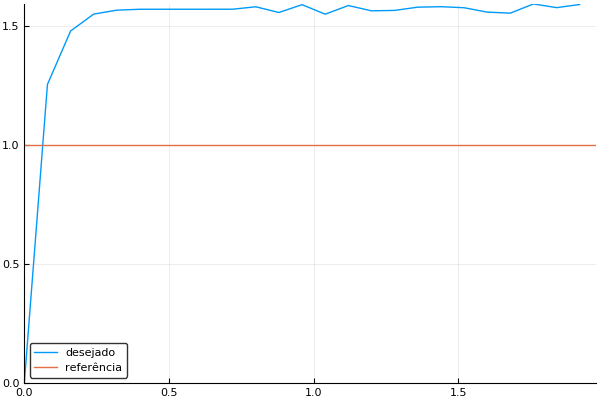

In [175]:
plotx(2)

In [176]:
println("Somatório do módulo do jerk")
for i = 1:7
    println("junta $(i) -> $(sum(abs.(j[i])))")
end
soma_jerk= 0.
for i = 1:7
    soma_jerk += sum(abs.(j[i]))
end
println("jerk total: $(soma_jerk)")

Somatório do módulo do jerk
junta 1 -> NaN
junta 2 -> NaN
junta 3 -> NaN
junta 4 -> NaN
junta 5 -> NaN
junta 6 -> NaN
junta 7 -> NaN
jerk total: NaN


In [177]:
println("Máximo módulo do jerk")
for i = 1:7
    println("junta $(i) -> $(maximum(abs.(j[i])))")
end 
soma_jerk_max = 0.
for i = 1:7
    soma_jerk_max += maximum(abs.(j[i]))
end
println("jerk máximo total: $(soma_jerk_max)")

Máximo módulo do jerk
junta 1 -> NaN
junta 2 -> NaN
junta 3 -> NaN
junta 4 -> NaN
junta 5 -> NaN
junta 6 -> NaN
junta 7 -> NaN
jerk máximo total: NaN
